Задание 1. Загрузка данных

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hnames = ['surgery', 'Age', 'rectal_temperature', 'pulse', 'respiratory_rate', 'temperature_of_extremities', 'pain', 'outcome']
hnumber = [0, 1, 3, 4, 5, 6, 10, 22]
na_values = ['?']

horse_data = pd.read_csv('C:/Users/bev20/OneDrive/Desktop/Курс Phyton/3 часть/1/практика_и_дз/horse_data.csv', usecols=hnumber, sep=',', na_values = na_values, header=None, names=hnames, engine='python')
horse_data.head()
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal_temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory_rate            242 non-null    float64
 5   temperature_of_extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


Задание 2. Первичное изучение данных

Анализ значений по столбцам

In [5]:
horse_data.describe()
horse_data.describe(include = 'all')

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


Базовые статистики/выбросы

Мода, Медиана, СКО, Дисперсия

In [2]:
print('\n Медиана')
for j in horse_data.columns:
    print( j,':',horse_data[j].median())
print('\n Мода')
for j in horse_data.columns:
    print(j,':',horse_data[j].mode())
print('\n СКО')
for j in horse_data.columns:
    print(j,':',horse_data[j].std())
print('\n Дисперсия')
for j in horse_data.columns:
    print(j,':',horse_data[j].var())


 Медиана
surgery : 1.0
Age : 1.0
rectal_temperature : 38.2
pulse : 64.0
respiratory_rate : 24.5
temperature_of_extremities : 3.0
pain : 3.0
outcome : 1.0

 Мода
surgery : 0    1.0
dtype: float64
Age : 0    1
dtype: int64
rectal_temperature : 0    38.0
dtype: float64
pulse : 0    48.0
dtype: float64
respiratory_rate : 0    20.0
dtype: float64
temperature_of_extremities : 0    3.0
dtype: float64
pain : 0    3.0
dtype: float64
outcome : 0    1.0
dtype: float64

 СКО
surgery : 0.49030464432881815
Age : 2.1739719055576163
rectal_temperature : 0.7322886641121578
pulse : 28.630556660735003
respiratory_rate : 17.642231385134664
temperature_of_extremities : 1.0450536920112758
pain : 1.3079395711243502
outcome : 0.7371869448054933

 Дисперсия
surgery : 0.24039864425040888
Age : 4.726153846153814
rectal_temperature : 0.5362466875871686
pulse : 819.7087747035575
respiratory_rate : 311.24832824663054
temperature_of_extremities : 1.0921372191863987
pain : 1.710705921712949
outcome : 0.5434445915916

Выбросы (межквартильный размах)

In [7]:
for j in horse_data.columns:
    horse_data[j].describe()
    q1 = horse_data[j].quantile(0.25)
    q3 = horse_data[j].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5)*iqr
    upper_bound = q3 + (1.5)*iqr
    remove_outliers= horse_data[~horse_data[j].between(lower_bound, upper_bound, inclusive=True)].sort_values(j)
    print(remove_outliers)

     surgery  Age  rectal_temperature  pulse  respiratory_rate  \
132      NaN    1                38.0   48.0              20.0   

     temperature_of_extremities  pain  outcome  
132                         3.0   4.0      NaN  
     surgery  Age  rectal_temperature  pulse  respiratory_rate  \
3        1.0    9                39.1  164.0              84.0   
262      2.0    9                38.6   88.0              28.0   
255      1.0    9                38.8  184.0              84.0   
252      1.0    9                38.8  124.0              36.0   
244      1.0    9                38.2  124.0              88.0   
229      1.0    9                38.5  120.0              70.0   
227      1.0    9                 NaN    NaN               NaN   
212      1.0    9                38.9  120.0              30.0   
191      2.0    9                 NaN  100.0              44.0   
135      1.0    9                38.1  136.0              48.0   
109      1.0    9                38.4   84.

Задание 3. Работа с пропусками. Визуализация данных

In [8]:
import seaborn as sns
horse_data.info()
# Заполняем пропуски в surgery, outcome, rectal_temperature, pulse, respiratory_rate, temperature_of_extremities, pain
# Анализ проведено на основании распределения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal_temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory_rate            242 non-null    float64
 5   temperature_of_extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


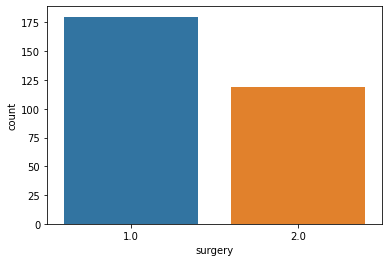

In [9]:
surgery_plot= sns.countplot(x = 'surgery', data = horse_data.sort_values('surgery'))
# surgery заполняем 1 (чаще встречается, 1 пропуск, оправдано)

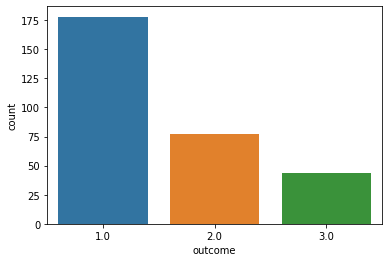

In [10]:
outcome_plot= sns.countplot(x = 'outcome', data = horse_data.sort_values('outcome'))
# outcome заполняем 1 (чаще встречается, 1 пропуск, оправдано)

<AxesSubplot:title={'center':'Распределение rectal_temperature'}, ylabel='Frequency'>

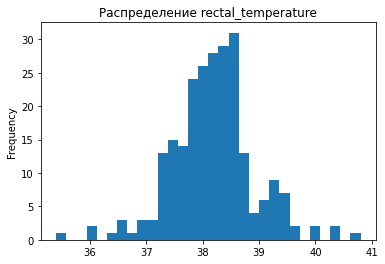

In [19]:
horse_data['rectal_temperature'].plot(kind='hist', 
                     title='Распределение rectal_temperature', bins=30)
# Нормальное распределение. Заменяем средним значением

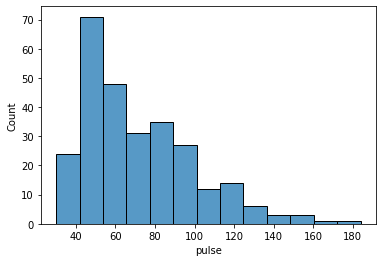

In [12]:
pulse_plot= sns.histplot(x = 'pulse', data = horse_data)
# Исходя из распределения (скошено влево) можно заменить медианой. Либо средним значением по группировке по возрасту (кажется интуитивно верным)


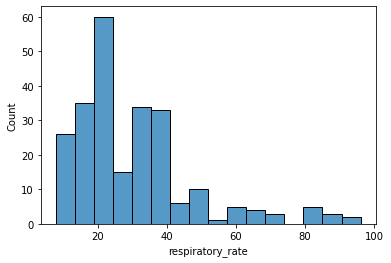

In [13]:
respiratory_rate_plot= sns.histplot(x = 'respiratory_rate', data = horse_data)
# Исходя из распределения (скошено влево) можно заменить медианой. Либо средним значением по группировке по возрасту (кажется интуитивно верным)


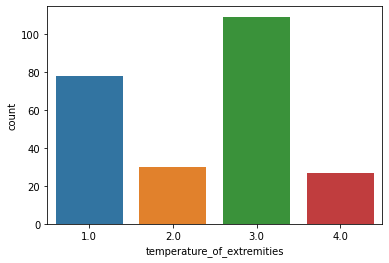

In [30]:
temperature_of_ext_plot= sns.countplot(x = 'temperature_of_extremities', data = horse_data.sort_values('temperature_of_extremities'))
# Заполняем 3 (чаще встречается)

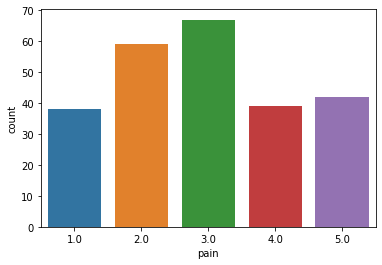

In [31]:
pain_plot= sns.countplot(x = 'pain', data = horse_data.sort_values('pain'))
# Заполняем 3 (чаще встречается)

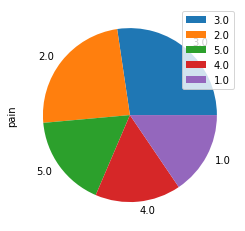

In [10]:
# Круговой тип диаграммы
pain_plot_2 = horse_data['pain'].value_counts().head(6)
pain_plot_2.plot(kind='pie')
plt.legend()

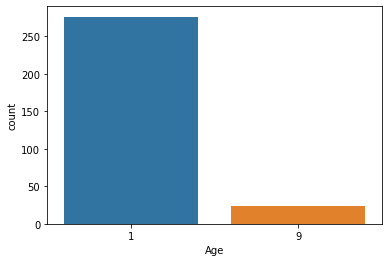

In [32]:
age_plot= sns.countplot(x = 'Age', data = horse_data.sort_values('Age'))

<AxesSubplot:title={'center':'Корреляция между Возрастом и Температурой'}, xlabel='pulse', ylabel='rectal_temperature'>

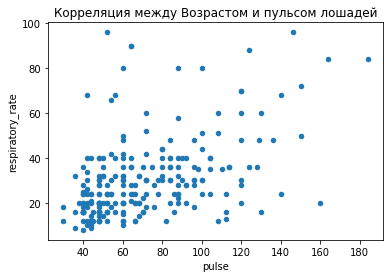

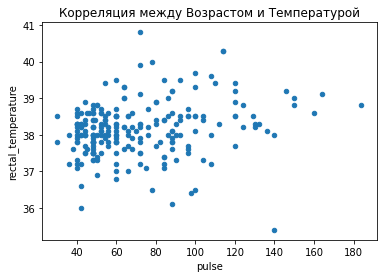

In [3]:
# Посмотрим на взаимосвязь Пиульса лошадей и Температурой/Частотой дыхания
horse_data.plot(kind='scatter', 
        x='pulse', 
        y='respiratory_rate', 
        title='Корреляция между Возрастом и пульсом лошадей')
horse_data.plot(kind='scatter', 
        x='pulse', 
        y='rectal_temperature', 
        title='Корреляция между Возрастом и Температурой')

По точечным диаграммам можно сделать вывод, что корреляция между Пульсом лошадей и Температурой/Частотой дыхания достаточно слабая

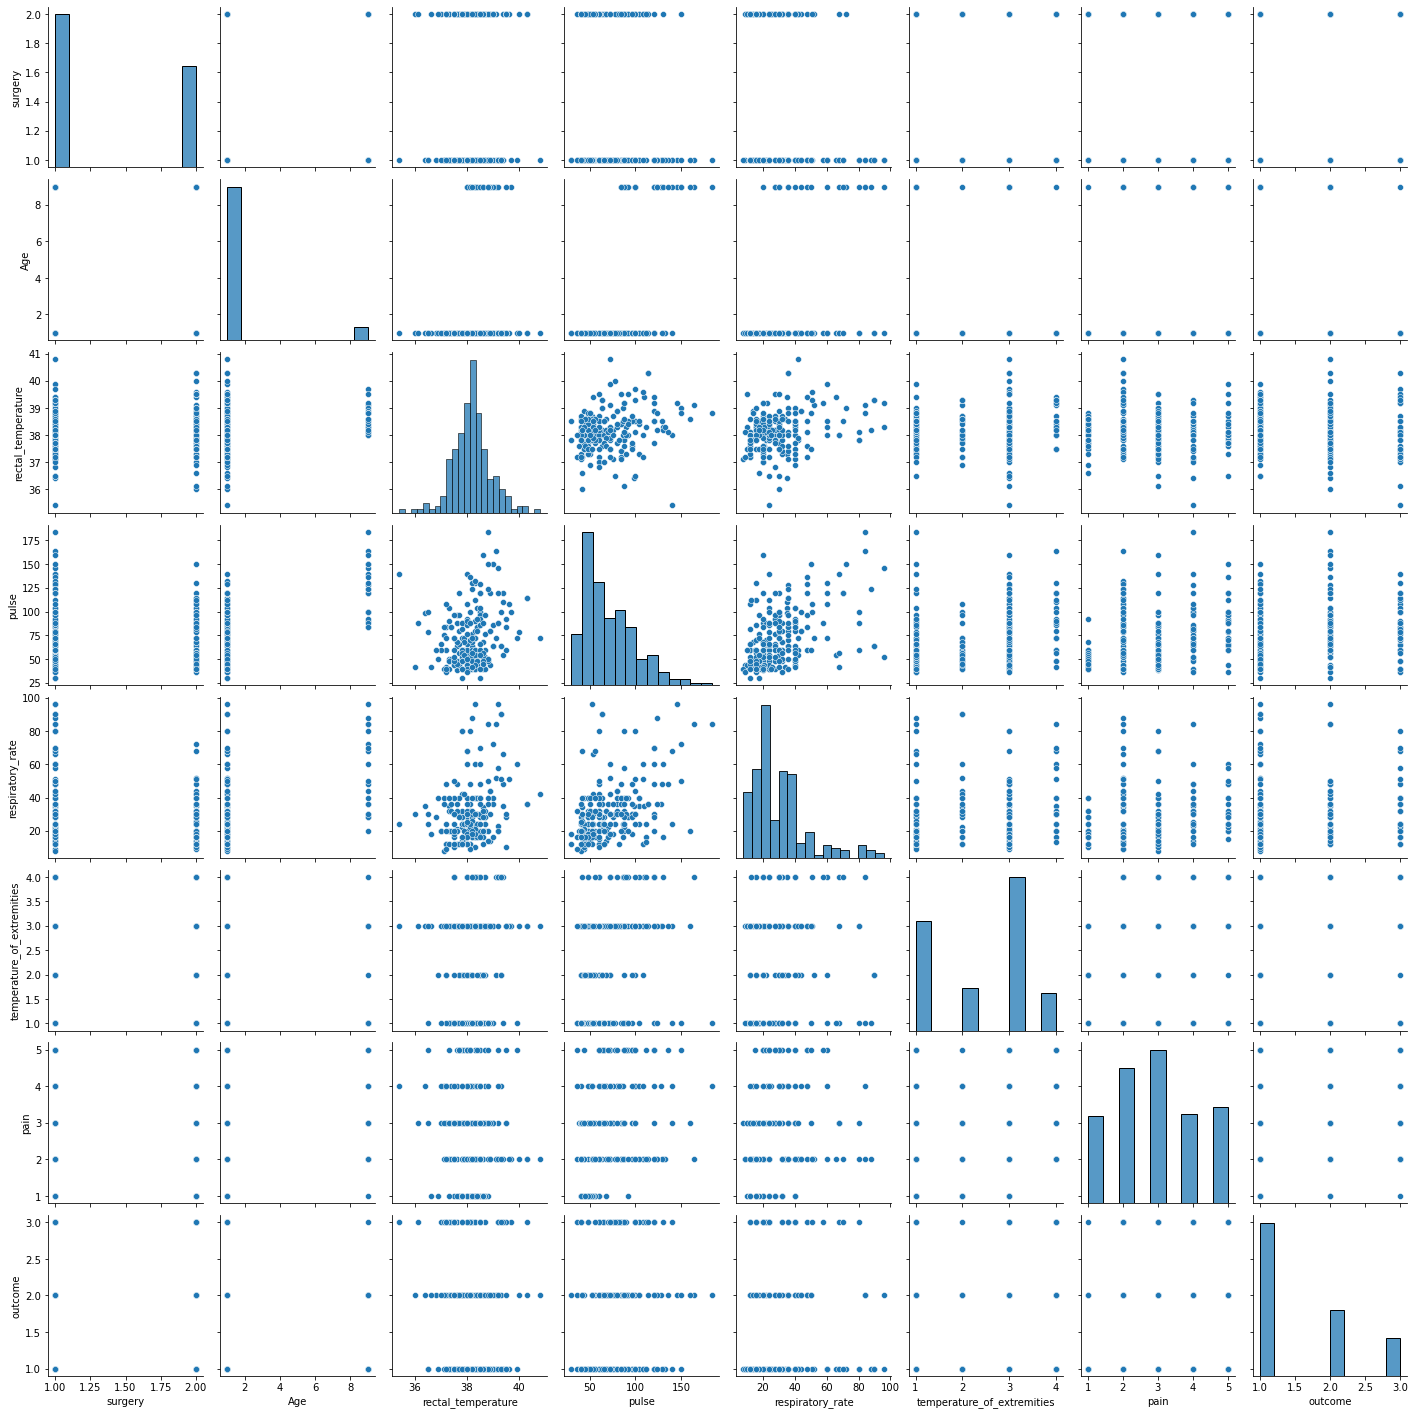

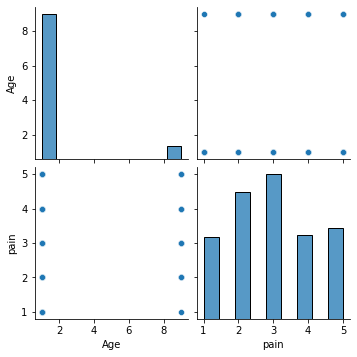

In [7]:
sns.pairplot(horse_data)
sns.pairplot(horse_data[['Age', 'pain']])

Формируем новый дата-фрейм с заменой пропусков

In [35]:
horse_data_final = horse_data
horse_data_final['surgery'].fillna(1, inplace = True)
horse_data_final['outcome'].fillna(1, inplace = True)
horse_data_final['rectal_temperature'] = horse_data_final['rectal_temperature'].fillna(horse_data['rectal_temperature'].mean())
horse_data_final['pulse'] = horse_data_final['pulse'].fillna(horse_data.groupby('Age')['pulse'].transform('mean'))
horse_data_final['respiratory_rate'] = horse_data_final['respiratory_rate'].fillna(horse_data.groupby('Age')['respiratory_rate'].transform('mean'))
horse_data_final['temperature_of_extremities'].fillna(3, inplace = True)
horse_data_final['pain'].fillna(3, inplace = True)

In [38]:
horse_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     300 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal_temperature          300 non-null    float64
 3   pulse                       300 non-null    float64
 4   respiratory_rate            300 non-null    float64
 5   temperature_of_extremities  300 non-null    float64
 6   pain                        300 non-null    float64
 7   outcome                     300 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB
